<a href="https://colab.research.google.com/github/hyunil-cho/ml_practice/blob/main/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
colunmns = iris.feature_names
iris_df = pd.DataFrame(iris.data, columns=colunmns)
iris_df['target'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


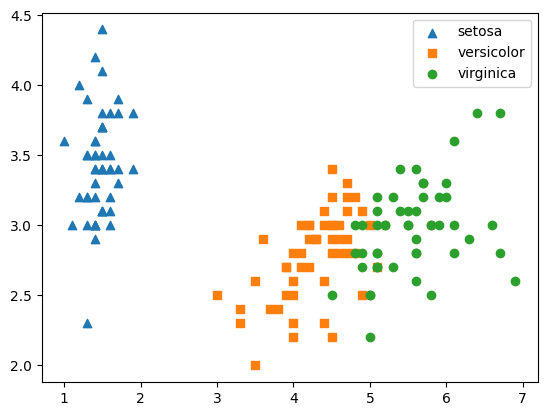

In [13]:
markers = ['^', 's', 'o']

for i, markers in enumerate(markers):
    x_axis_data = iris_df[iris_df['target'] == i]['petal length (cm)']
    y_axis_data = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=markers, label=iris.target_names[i] )
    plt.legend()

In [18]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.drop('target', axis=1))
iris_scaled.shape, iris_df.shape

((150, 4), (150, 5))

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_scaled)
pca_transformed

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [25]:
pca_colmums = ['PCA_COMPONENT_1', 'PCA_COMPONENT_2']
pca_df = pd.DataFrame(pca_transformed, columns=pca_colmums)
pca_df['target'] = iris_df['target']

pca_df.head(10)

,PCA_COMPONENT_1,PCA_COMPONENT_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
5,-2.075631,1.489178,0
6,-2.444029,0.047644,0
7,-2.232847,0.223148,0
8,-2.334640,-1.115328,0
9,-2.184328,-0.469014,0


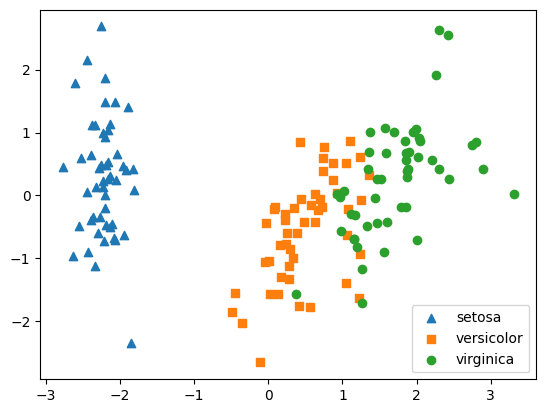

In [32]:
markers = ['^', 's', 'o']

for i, markers in enumerate(markers):
    x_axis_data = pca_df[pca_df['target'] == i]['PCA_COMPONENT_1']
    y_axis_data = pca_df[pca_df['target'] == i]['PCA_COMPONENT_2']
    plt.scatter(x_axis_data, y_axis_data, marker=markers, label=iris.target_names[i] )
    plt.legend()

In [48]:
pd.set_option('display.max_columns', 30)

df = pd.read_excel('sample_data/default of credit card clients.xls', header=1, sheet_name='Data').iloc[:, 1:]
df.head()
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
x_features = df.drop('default', axis=1)

BILL_AMT 간의 상관관계가 매우 높음

In [49]:
x_features.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


In [54]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

scaler = StandardScaler()
df = pca.fit(scaler.fit_transform(x_features[cols_bill]))
pca.explained_variance_ratio_

array([0.90555253, 0.0509867 ])

In [58]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=50, random_state=156)
scores = cross_val_score(rf_clf, df, y_target, scoring='accuracy', cv=3)

scores

array([1., 1., 1.])

In [59]:
scores

array([1., 1., 1.])